# Problem 4

In [1]:
import numpy as np
import seaborn as sns

from numpy.linalg import eig
from matplotlib import pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def plot_confusion_matrix(validations, predictions):
    """ Plot confusion matrix and compare real labels with predicted labels. """

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### "chi2" criteria

In [3]:
vectorizer = TfidfVectorizer()
categories = ['alt.atheism', 'talk.religion.misc', 'sci.space']

X_train = fetch_20newsgroups(subset='train', categories=categories)
X_test = fetch_20newsgroups(subset='test', categories=categories)
y_train = X_train.target
y_test = X_test.target

LABELS = set(y_train)

X_train = vectorizer.fit_transform(X_train.data).todense()
X_test = vectorizer.transform(X_test.data).todense()
print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('X_test shape -', X_test.shape)
print('y_test shape -', y_test.shape)
print('Labels -', LABELS)

X_train shape - (1450, 27298)
y_train shape - (1450,)
X_test shape - (964, 27298)
y_test shape - (964,)
Labels - {0, 1, 2}


In [4]:
X_train, y_train = shuffle(X_train, y_train)

skb = SelectKBest(chi2, k=200)
X_train = skb.fit_transform(X_train, y_train)
X_test = skb.transform(X_test)
print('X_train shape -', X_train.shape, '(after feature selection using Chi2 criteria)')
print('X_test shape -', X_test.shape, '(after feature selection using Chi2 criteria)')

X_train shape - (1450, 200) (after feature selection using Chi2 criteria)
X_test shape - (964, 200) (after feature selection using Chi2 criteria)


In [5]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

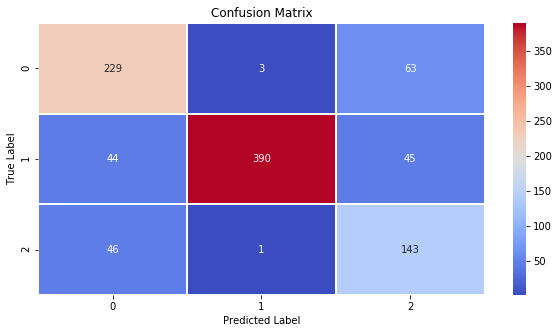

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       295
           1       0.99      0.81      0.89       479
           2       0.57      0.75      0.65       190

    accuracy                           0.79       964
   macro avg       0.76      0.78      0.76       964
weighted avg       0.82      0.79      0.80       964



In [6]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

### "mutual-information" criteria

In [4]:
vectorizer = TfidfVectorizer()
categories = ['alt.atheism', 'talk.religion.misc', 'sci.space']

X_train = fetch_20newsgroups(subset='train', categories=categories)
X_test = fetch_20newsgroups(subset='test', categories=categories)
y_train = X_train.target
y_test = X_test.target

LABELS = set(y_train)

X_train = vectorizer.fit_transform(X_train.data).todense()
X_test = vectorizer.transform(X_test.data).todense()
print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('X_test shape -', X_test.shape)
print('y_test shape -', y_test.shape)
print('Labels -', LABELS)

X_train shape - (1450, 27298)
y_train shape - (1450,)
X_test shape - (964, 27298)
y_test shape - (964,)
Labels - {0, 1, 2}


In [5]:
X_train, y_train = shuffle(X_train, y_train)

skb = SelectKBest(mutual_info_classif, k=200)
X_train = skb.fit_transform(X_train, y_train)
X_test = skb.transform(X_test)
print('X_train shape -', X_train.shape, '(after feature selection using Mutual Info criteria)')
print('X_test shape -', X_test.shape, '(after feature selection using Mutual Info criteria)')

X_train shape - (1450, 200) (after feature selection using Mutual Info criteria)
X_test shape - (964, 200) (after feature selection using Mutual Info criteria)


In [6]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

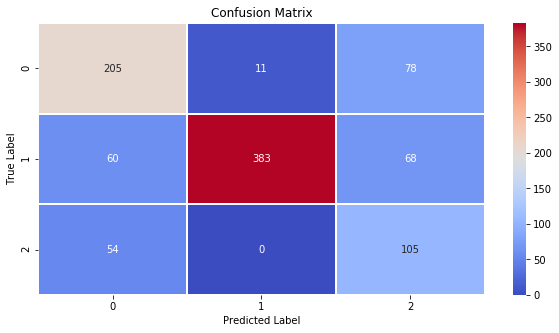

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       294
           1       0.97      0.75      0.85       511
           2       0.42      0.66      0.51       159

    accuracy                           0.72       964
   macro avg       0.68      0.70      0.68       964
weighted avg       0.78      0.72      0.74       964



In [7]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))